In [1]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [2]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.isna().any().sum()

0

In [5]:
test.isna().any().sum()

0

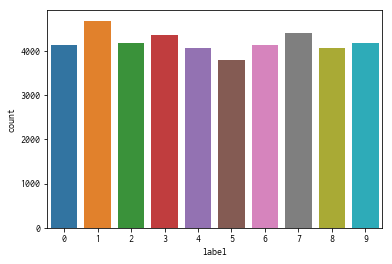

In [6]:
sns.countplot(train['label'])

In [7]:
train['pixel100'].describe()

count    42000.000000
mean        13.072714
std         49.963775
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        255.000000
Name: pixel100, dtype: float64

In [8]:
y_train = train['label']

In [9]:
X_train = train.drop('label', axis=1)

In [10]:
del train

In [11]:
X_test = test

In [12]:
del test

In [13]:
X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

In [15]:
X_train.shape

(42000, 28, 28, 1)

In [16]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
y_train.shape

(42000, 10)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

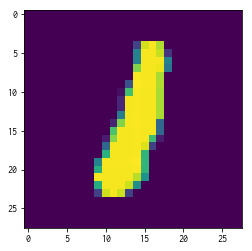

In [19]:
plt.imshow(X_train[0][:,:,0])

In [20]:
from keras.models import Sequential
model = Sequential()

In [21]:
#https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-64
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [22]:
from keras.optimizers import RMSprop

optimizer = RMSprop(lr = 0.001, rho=0.9, epsilon=1e-08, decay=0.)

In [23]:
model.compile(optimizer=optimizer, metrics=['accuracy'], loss='categorical_crossentropy')

In [24]:
history = model.fit(x=X_train, y=y_train)

Epoch 1/1
31500/31500 [==============================] - 210s 7ms/step - loss: 0.2162 - acc: 0.9320


In [31]:
y_pred = model.predict(X_val)

In [32]:
y_pred = np.argmax(y_pred, axis=1)

In [33]:
y_pred

array([0, 3, 7, ..., 8, 7, 4])

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, np.argmax(y_val, axis=1))

0.9809523809523809

In [43]:
y_test = model.predict(X_test)

In [44]:
y_test = np.argmax(y_test, axis=1)

In [45]:
y_test

array([2, 0, 9, ..., 3, 9, 2])

In [50]:
submit = pd.DataFrame({'ImageId':pd.Series(range(1, X_test.shape[0]+1)), 'Label':pd.Series(y_test)})

In [51]:
submit

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [52]:
submit.to_csv('submit.csv', index=False)